<a href="https://colab.research.google.com/github/RaweenS/DADS6003/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) โดย น.ศ. สามารถเลือกหุ้น (ทั่วโลก) ได้ตามใจชอบมา 1 หุ้น และจะใช้ data ย้อนหลังกี่วันก็ได้ แต่ time frame (window) ต้องเป็น 1 ชั่วโมงเหมือนกันทุกคน (ตามที่กำหนดไว้ใน starter kit link ข้างบน) แล้วแสดงผลลัพธ์ของกราฟ

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
st = yf.Ticker('BLK')
interval = '1h'
st_df = st.history(interval=interval,period='730d')
st_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-03-26 09:30:00-04:00,731.320007,740.349976,731.320007,740.070007,69171,0.0,0.0
2021-03-26 10:30:00-04:00,740.359985,741.830017,737.950012,739.804993,56020,0.0,0.0
2021-03-26 11:30:00-04:00,740.299988,745.179993,740.200012,743.940002,61575,0.0,0.0
2021-03-26 12:30:00-04:00,744.539978,747.739990,744.021118,747.739990,63640,0.0,0.0
2021-03-26 13:30:00-04:00,747.789978,751.919983,745.900024,748.565002,140281,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-16 13:30:00-05:00,797.400024,797.840027,796.690002,797.625000,24681,0.0,0.0
2024-02-16 14:30:00-05:00,797.429993,797.440002,792.109985,793.830017,43041,0.0,0.0
2024-02-16 15:30:00-05:00,794.390015,794.570007,791.239990,794.109985,84820,0.0,0.0


In [ ]:
st_df.dropna(inplace=True)
st_df = st_df.iloc[:,:4]
st_df.head()

,Open,High,Low,Close
Datetime,,,,
2021-03-26 09:30:00-04:00,731.320007,740.349976,731.320007,740.070007
2021-03-26 10:30:00-04:00,740.359985,741.830017,737.950012,739.804993
2021-03-26 11:30:00-04:00,740.299988,745.179993,740.200012,743.940002
2021-03-26 12:30:00-04:00,744.539978,747.739990,744.021118,747.739990
2021-03-26 13:30:00-04:00,747.789978,751.919983,745.900024,748.565002


In [ ]:
st_df['S_10'] = st_df['Close'].rolling(window=10).mean()
st_df['Corr'] = st_df['Close'].rolling(window=10).corr(st_df['S_10'])
st_df['RSI'] = ta.RSI(np.array(st_df['Close']), timeperiod =10)
st_df['Open-Close'] = st_df['Open'] - st_df['Close'].shift(1)
st_df['Open-Open'] = st_df['Open'] - st_df['Open'].shift(1)
st_df.dropna(inplace=True)
X = st_df.iloc[:,:9]

In [ ]:
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2021-03-30 13:30:00-04:00,751.200012,751.429993,749.440002,750.640015,755.515497,-0.180783,53.269376,0.080017,-1.880005
2021-03-30 14:30:00-04:00,750.820007,752.489990,750.140015,751.760010,755.342499,-0.464396,55.530025,0.179993,-0.380005
2021-03-30 15:30:00-04:00,751.784973,752.380005,746.960022,748.630005,754.605499,-0.552108,48.277885,0.024963,0.964966
2021-03-31 09:30:00-04:00,749.969971,755.599976,748.849976,754.969971,754.345496,-0.621859,60.026985,1.339966,-1.815002
2021-03-31 10:30:00-04:00,754.156372,757.750000,754.020020,755.770020,753.798499,-0.388061,61.260844,-0.813599,4.186401
...,...,...,...,...,...,...,...,...,...
2024-02-16 13:30:00-05:00,797.400024,797.840027,796.690002,797.625000,797.427936,-0.364800,57.737033,0.400024,0.590027
2024-02-16 14:30:00-05:00,797.429993,797.440002,792.109985,793.830017,797.081940,-0.529835,49.726388,-0.195007,0.029968
2024-02-16 15:30:00-05:00,794.390015,794.570007,791.239990,794.109985,796.662830,-0.589824,50.291713,0.559998,-3.039978


In [ ]:
y = np.where(st_df['Close'].shift(-1) > st_df['Close'],1,-1)

In [ ]:
split = int(0.7*len(st_df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.003339017851364694]
1,High,[0.014140308305374015]
2,Low,[-0.015287926889317599]
3,Close,[0.0021187280891913456]
4,S_10,[-0.004469500256122857]
5,Corr,[-0.0067056796240784694]
6,RSI,[0.0007978305336544585]
7,Open-Close,[0.021515309339308727]
8,Open-Open,[-0.005900905723916535]


In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.50962277 0.49037723]
 [0.5033769  0.4966231 ]
 [0.49796543 0.50203457]
 ...
 [0.50330344 0.49669656]
 [0.5072202  0.4927798 ]
 [0.50780739 0.49219261]]


In [ ]:
predicted = model.predict(X_test)
predicted

array([-1, -1,  1, ..., -1, -1, -1])

In [ ]:
# Find the dates with predicted buy signals (Signal = 1)
dates_of_prediction = X_test.index
buy_signal_dates = dates_of_prediction[predicted == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
DatetimeIndex(['2023-04-06 09:30:00-04:00', '2023-04-10 12:30:00-04:00',
               '2023-04-11 09:30:00-04:00', '2023-04-11 10:30:00-04:00',
               '2023-04-11 11:30:00-04:00', '2023-04-11 13:30:00-04:00',
               '2023-04-11 14:30:00-04:00', '2023-04-11 15:30:00-04:00',
               '2023-04-12 09:30:00-04:00', '2023-04-12 10:30:00-04:00',
               ...
               '2024-02-09 11:30:00-05:00', '2024-02-12 09:30:00-05:00',
               '2024-02-12 10:30:00-05:00', '2024-02-12 13:30:00-05:00',
               '2024-02-14 09:30:00-05:00', '2024-02-14 10:30:00-05:00',
               '2024-02-14 11:30:00-05:00', '2024-02-15 09:30:00-05:00',
               '2024-02-15 11:30:00-05:00', '2024-02-15 13:30:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=424, freq=None)


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[543 201]
 [555 223]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.49      0.73      0.59       744
           1       0.53      0.29      0.37       778

    accuracy                           0.50      1522
   macro avg       0.51      0.51      0.48      1522
weighted avg       0.51      0.50      0.48      1522



In [ ]:
model1 = model.score(X_test,y_test)
print(model.score(X_test,y_test))

0.5032851511169514


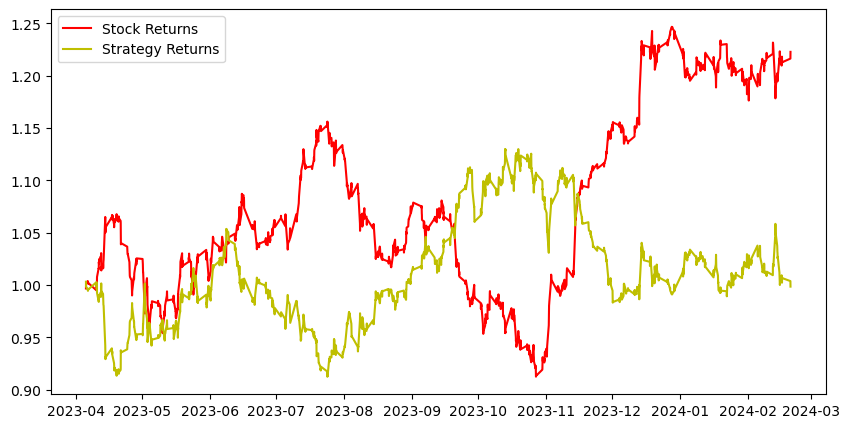

In [ ]:
st_df['Predicted_Signal'] = model.predict(X)
st_df['Stock_returns'] = np.log(st_df['Close']/st_df['Close'].shift(1))
Cumulative_Stock_returns1 = np.exp(np.cumsum(st_df[split:]['Stock_returns']))


st_df['Strategy_returns'] = st_df['Stock_returns']* st_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns1 = np.exp(np.cumsum(st_df[split:]['Strategy_returns']))

Csr = Cumulative_Stock_returns1.iloc[-1]
Cstr = Cumulative_Strategy_returns1.iloc[-1]

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Stock_returns1, color='r', label = 'Stock Returns')
plt.plot(Cumulative_Strategy_returns1, color='y', label = 'Strategy Returns')
plt.legend()
plt.show()

In [ ]:
print(Cumulative_Stock_returns1.iloc[-1])
print(Cumulative_Strategy_returns1.iloc[-1])

1.2228026038683626
0.9985381949776182


b) เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a.

In [ ]:
st_df2 = st_df.copy()

In [ ]:
st_df2.drop(columns=['Strategy_returns','Predicted_Signal','Open-Close','Open-Open'],inplace=True)

In [ ]:
st_df2['RSI_'] = ta.RSI(np.array(st_df2['Close']), timeperiod =14)
st_df2['CloseY'] = st_df2.Close.shift(1)
st_df2['Open-Close'] = st_df2['Open'] - st_df2['CloseY']
st_df2['S_5'] = st_df2['Close'].rolling(window=5).mean()
st_df2['Lag_ret1'] = st_df2['Stock_returns'].shift(1)
st_df2['Lag_ret2'] = st_df2['Stock_returns'].shift(2)
st_df2.dropna(inplace=True)
feature = ['RSI_','Open-Close','S_5','Lag_ret1','Lag_ret2']
X = st_df2.loc[:,feature]


In [ ]:
X

,RSI_,Open-Close,S_5,Lag_ret1,Lag_ret2
Datetime,,,,,
2021-04-01 13:30:00-04:00,68.041705,0.075012,764.290002,-0.002161,0.005376
2021-04-01 14:30:00-04:00,68.284732,0.034058,764.575000,-0.000765,-0.002161
2021-04-01 15:30:00-04:00,70.578538,-0.639954,765.516992,0.000353,-0.000765
2021-04-05 09:30:00-04:00,79.012662,5.280029,768.288989,0.003356,0.000353
2021-04-05 10:30:00-04:00,80.402015,0.070007,772.000989,0.017137,0.003356
...,...,...,...,...,...
2024-02-16 13:30:00-05:00,56.254664,0.400024,796.029993,0.000238,0.000176
2024-02-16 14:30:00-05:00,50.911038,-0.195007,796.387000,0.000784,0.000238
2024-02-16 15:30:00-05:00,51.278726,0.559998,795.875000,-0.004769,0.000784


In [ ]:
y = np.where(st_df2['Close'].shift(-1) > st_df2['Close'],1,-1)

In [ ]:
split = int(0.7*len(st_df2))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,RSI_,[0.0025926899959169574]
1,Open-Close,[0.018479886115564587]
2,S_5,[-0.00017422882365445422]
3,Lag_ret1,[-4.597775346688636e-05]
4,Lag_ret2,[-1.60188462378894e-05]


In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.4990512  0.5009488 ]
 [0.49383936 0.50616064]
 [0.4972597  0.5027403 ]
 ...
 [0.49890981 0.50109019]
 [0.52182335 0.47817665]
 [0.49639302 0.50360698]]


In [ ]:
predicted = model.predict(X_test)
predicted

array([ 1,  1,  1, ...,  1, -1,  1])

In [ ]:
dates_of_prediction = X_test.index
buy_signal_dates = dates_of_prediction[predicted == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
DatetimeIndex(['2023-04-06 11:30:00-04:00', '2023-04-06 12:30:00-04:00',
               '2023-04-06 13:30:00-04:00', '2023-04-06 14:30:00-04:00',
               '2023-04-06 15:30:00-04:00', '2023-04-10 10:30:00-04:00',
               '2023-04-10 12:30:00-04:00', '2023-04-10 13:30:00-04:00',
               '2023-04-10 14:30:00-04:00', '2023-04-10 15:30:00-04:00',
               ...
               '2024-02-15 12:30:00-05:00', '2024-02-15 13:30:00-05:00',
               '2024-02-15 14:30:00-05:00', '2024-02-15 15:30:00-05:00',
               '2024-02-16 10:30:00-05:00', '2024-02-16 11:30:00-05:00',
               '2024-02-16 12:30:00-05:00', '2024-02-16 13:30:00-05:00',
               '2024-02-16 15:30:00-05:00', '2024-02-20 10:30:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=898, freq=None)


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[328 414]
 [292 484]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.53      0.44      0.48       742
           1       0.54      0.62      0.58       776

    accuracy                           0.53      1518
   macro avg       0.53      0.53      0.53      1518
weighted avg       0.53      0.53      0.53      1518



In [ ]:
model2 = model.score(X_test,y_test)
print(model.score(X_test,y_test))

0.5349143610013175


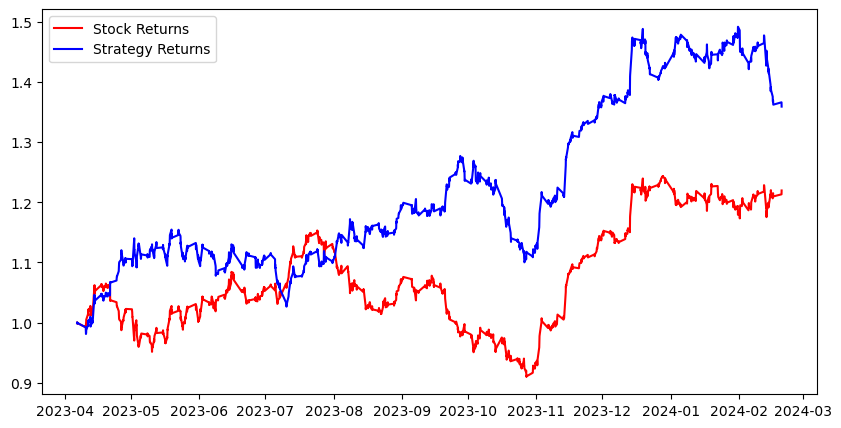

In [ ]:
st_df2['Predicted_Signal'] = model.predict(X)
st_df2['Stock_returns'] = np.log(st_df2['Close']/st_df2['Close'].shift(1))
Cumulative_Stock_returns2 = np.exp(np.cumsum(st_df2[split:]['Stock_returns']))


st_df2['Strategy_returns'] = st_df2['Stock_returns']* st_df2['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns2 = np.exp(np.cumsum(st_df2[split:]['Strategy_returns']))

Csr2 = Cumulative_Stock_returns2.iloc[-1]
Cstr2 = Cumulative_Strategy_returns2.iloc[-1]

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Stock_returns2, color='r', label = 'Stock Returns')
plt.plot(Cumulative_Strategy_returns2, color='b', label = 'Strategy Returns')
plt.legend()
plt.show()

In [ ]:
print(f'Stock return 1: {Csr}')
print(f'Stock return 2: {Csr2}')
print(f'Strategy 1 return: {Cstr}')
print(f'Strategy 2 return: {Cstr2}')
print(f'Model1 Score: {model1}')
print(f'Model2 Score: {model2}')

Stock return 1: 1.2228026038683626
Stock return 2: 1.219654502932695
Strategy 1 return: 0.9985381949776182
Strategy 2 return: 1.3589103240097744
Model1 Score: 0.5032851511169514
Model2 Score: 0.5349143610013175


# Build on first strategy

In [ ]:
st_df3 = st_df.copy()
st_df3.drop(columns=['Strategy_returns','Predicted_Signal',"RSI","S_10","Corr"],inplace=True)

In [ ]:
st_df3['RSI14'] = ta.RSI(np.array(st_df3['Close']), timeperiod =14)
st_df['S_5'] = st_df['Close'].rolling(window=5).mean()
st_df['Corr'] = st_df['Close'].rolling(window=5).corr(st_df['S_5'])
st_df3['CloseY'] = st_df2.Close.shift(1)
st_df3['Open-CloseY'] = st_df3['Open'] - st_df3['CloseY']
st_df3['Lag_ret1'] = st_df3['Stock_returns'].shift(1)
st_df3['Lag_ret2'] = st_df3['Stock_returns'].shift(2)
st_df3.dropna(inplace=True)
st_df3.drop(columns=['Stock_returns'],inplace=True)
X = st_df3

In [ ]:
X

,Open,High,Low,Close,Open-Close,Open-Open,RSI14,CloseY,Open-CloseY,Lag_ret1,Lag_ret2
Datetime,,,,,,,,,,,
2021-04-01 14:30:00-04:00,764.364075,766.575012,764.090027,764.599976,0.034058,-0.625916,68.284732,764.330017,0.034058,-0.000765,-0.002161
2021-04-01 15:30:00-04:00,763.960022,767.190002,762.750000,767.169983,-0.639954,-0.404053,70.578538,764.599976,-0.639954,0.000353,-0.000765
2021-04-05 09:30:00-04:00,772.450012,780.510010,771.830017,780.429993,5.280029,8.489990,79.012662,767.169983,5.280029,0.003356,0.000353
2021-04-05 10:30:00-04:00,780.500000,783.700012,779.500000,783.474976,0.070007,8.049988,80.402015,780.429993,0.070007,0.017137,0.003356
2021-04-05 11:30:00-04:00,783.719971,787.755005,783.609985,785.650024,0.244995,3.219971,81.351667,783.474976,0.244995,0.003894,0.017137
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16 13:30:00-05:00,797.400024,797.840027,796.690002,797.625000,0.400024,0.590027,56.254664,797.000000,0.400024,0.000238,0.000176
2024-02-16 14:30:00-05:00,797.429993,797.440002,792.109985,793.830017,-0.195007,0.029968,50.911038,797.625000,-0.195007,0.000784,0.000238
2024-02-16 15:30:00-05:00,794.390015,794.570007,791.239990,794.109985,0.559998,-3.039978,51.278726,793.830017,0.559998,-0.004769,0.000784


In [ ]:
y = np.where(st_df3['Close'].shift(-1) > st_df3['Close'],1,-1)

In [ ]:
split = int(0.7*len(st_df2))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.005678111821324658]
1,High,[0.012460395000539772]
2,Low,[-0.013810953940200838]
3,Close,[-0.0005386420383693176]
4,Open-Close,[0.009762426705833277]
5,Open-Open,[-0.004329695683283902]
6,RSI14,[0.003001168976674664]
7,CloseY,[-0.004084314884487819]
8,Open-CloseY,[0.009762426705833277]
9,Lag_ret1,[-8.19588587511508e-05]


In [ ]:
probability = model.predict_proba(X_test)
print(probability)

[[0.50086921 0.49913079]
 [0.50349867 0.49650133]
 [0.50525975 0.49474025]
 ...
 [0.50228877 0.49771123]
 [0.51040755 0.48959245]
 [0.50509103 0.49490897]]


In [ ]:
predicted = model.predict(X_test)
predicted

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
dates_of_prediction = X_test.index
buy_signal_dates = dates_of_prediction[predicted == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
DatetimeIndex(['2023-04-10 12:30:00-04:00', '2023-04-10 14:30:00-04:00',
               '2023-04-10 15:30:00-04:00', '2023-04-11 09:30:00-04:00',
               '2023-04-11 10:30:00-04:00', '2023-04-11 11:30:00-04:00',
               '2023-04-11 12:30:00-04:00', '2023-04-11 13:30:00-04:00',
               '2023-04-11 14:30:00-04:00', '2023-04-11 15:30:00-04:00',
               ...
               '2024-02-12 09:30:00-05:00', '2024-02-12 10:30:00-05:00',
               '2024-02-12 12:30:00-05:00', '2024-02-12 13:30:00-05:00',
               '2024-02-12 14:30:00-05:00', '2024-02-14 09:30:00-05:00',
               '2024-02-15 09:30:00-05:00', '2024-02-15 11:30:00-05:00',
               '2024-02-15 13:30:00-05:00', '2024-02-16 10:30:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=675, freq=None)


In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[427 315]
 [415 360]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.51      0.58      0.54       742
           1       0.53      0.46      0.50       775

    accuracy                           0.52      1517
   macro avg       0.52      0.52      0.52      1517
weighted avg       0.52      0.52      0.52      1517



In [ ]:
model3 = model.score(X_test,y_test)
print(model.score(X_test,y_test))

0.5187870797626896


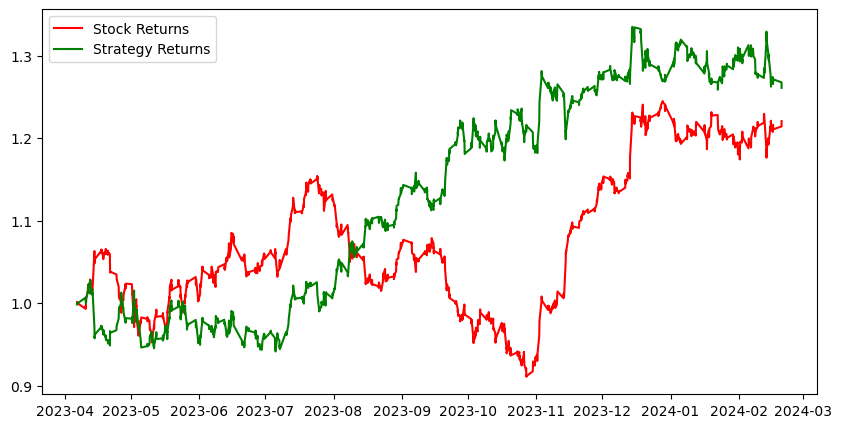

In [ ]:
st_df3['Predicted_Signal'] = model.predict(X)
st_df3['Stock_returns'] = np.log(st_df3['Close']/st_df3['Close'].shift(1))
Cumulative_Stock_returns3 = np.exp(np.cumsum(st_df3[split:]['Stock_returns']))


st_df3['Strategy_returns'] = st_df3['Stock_returns']* st_df3['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns3 = np.exp(np.cumsum(st_df3[split:]['Strategy_returns']))

Csr3 = Cumulative_Stock_returns3.iloc[-1]
Cstr3 = Cumulative_Strategy_returns3.iloc[-1]

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Stock_returns3, color='r', label = 'Stock Returns')
plt.plot(Cumulative_Strategy_returns3, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [ ]:
print(f'Stock return 1: {Csr}')
print(f'Stock return 2: {Csr2}')
print(f'Stock return 3: {Csr3}')
print(f'Strategy 1 return: {Cstr}')
print(f'Strategy 2 return: {Cstr2}')
print(f'Strategy 3 return: {Cstr3}')
print(f'Model1 Score: {model1}')
print(f'Model2 Score: {model2}')
print(f'Model3 Score: {model3}')

Stock return 1: 1.2228026038683626
Stock return 2: 1.219654502932695
Stock return 3: 1.2206214564932314
Strategy 1 return: 0.9985381949776182
Strategy 2 return: 1.3589103240097744
Strategy 3 return: 1.2609212448228941
Model1 Score: 0.5032851511169514
Model2 Score: 0.5349143610013175
Model3 Score: 0.5187870797626896


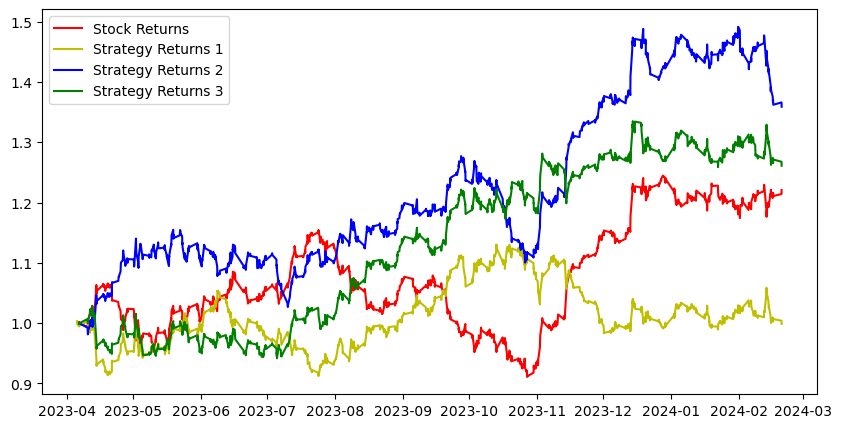

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Stock_returns3, color='r', label = 'Stock Returns')
plt.plot(Cumulative_Strategy_returns1, color='y', label = 'Strategy Returns 1')
plt.plot(Cumulative_Strategy_returns2, color='b', label = 'Strategy Returns 2')
plt.plot(Cumulative_Strategy_returns3, color='g', label = 'Strategy Returns 3')
plt.legend()
plt.show()